In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names, get_histplot
import seaborn as sns

In [3]:
# get the col reference table
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')

In [4]:
print(get_file_names(['IDEHR', 'EHRType', 'chk_stato_danimo'], df_ref))    # mood
print(get_file_names(['IDEHR', 'EHRType', 'stato_danimo'], df_ref))    # mood

['wH_DirectTable_VISITA_MED_VIDAS', 'wH_DirectTable_C_VISITA_MED_VIDAS']
['wH_DirectTable_C_VISITA_OSS_VIDAS', 'wH_DirectTable_VISITA_OSS_VIDAS']


In [5]:
df_referral = pd.read_csv('./vidas_data/survival_time.csv')
print(df_referral.shape)
df_referral.head()

(5563, 7)


,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref
0,3263,2015-10-02 07:50:00.000,AMB,2015-09-21 10:00:18.743,10.0,Liver-Biliary,1550
1,1414,2015-10-05 11:50:00.000,EHR,2015-10-02 15:45:06.800,2.0,Myeloid Leukemia,28983
2,3394,2015-10-06 03:25:00.000,AMB,2015-09-25 18:17:56.940,10.0,Lung,1629
3,3417,2015-10-05 15:00:00.000,AMB,2015-09-28 17:26:59.413,6.0,Skin,1739
4,2977,2015-10-06 06:00:00.000,AMB,2015-09-08 11:26:31.850,27.0,Palliative (Non-Malignant),1


In [6]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_MED_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
df_obs.shape

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (16,17,18,19,20,21,22,50,97,98,100,116,142) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(57242, 175)

No. of unique IDEHR:  3399


<Figure size 1080x576 with 0 Axes>

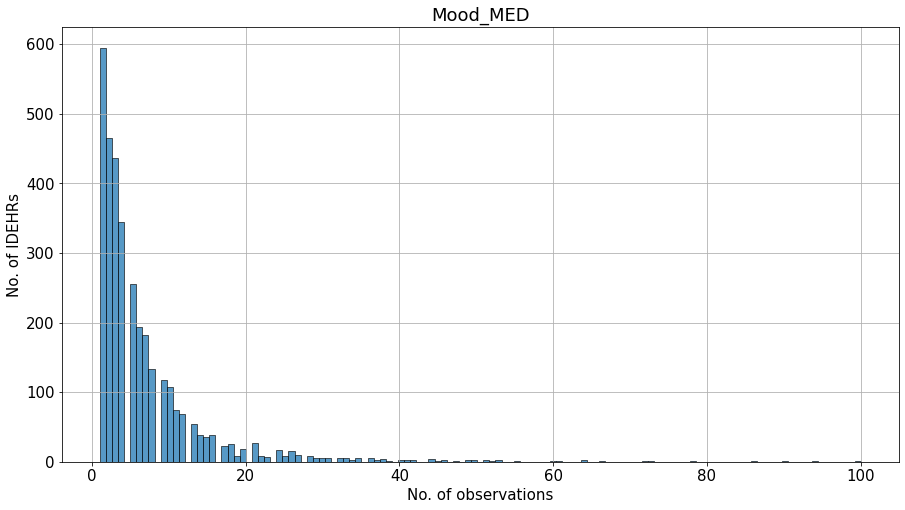

In [7]:
# plot the distribution of entries 
get_histplot('chk_stato_danimo', df_obs, 'Mood_MED')

In [8]:
mood_med = df_obs[['IDEHR', 'chk_stato_danimo']].dropna().IDEHR.value_counts().values
mood_med

array([100,  94,  90, ...,   1,   1,   1], dtype=int64)

In [9]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_OSS_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
df_obs.shape

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (21,22,26,27,28,31,48,51,58,72,82,83,90,93,98,99,116,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(68790, 136)

No. of unique IDEHR:  1927


<Figure size 1080x576 with 0 Axes>

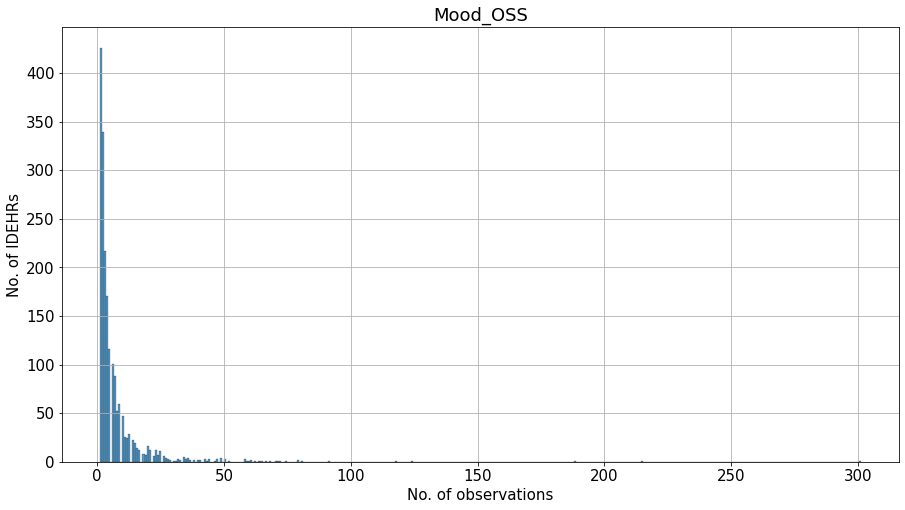

In [10]:
get_histplot('stato_danimo', df_obs, 'Mood_OSS')

In [11]:
mood_oss = df_obs[['IDEHR', 'stato_danimo']].dropna().IDEHR.value_counts().values
mood_oss

array([301, 215, 188, ...,   1,   1,   1], dtype=int64)

In [12]:
print(get_file_names(['IDEHR', 'EHRType', 'Stato_animo'], df_ref))

['wH_DirectTable_XX_VISITA_INF_VIDAS', 'wH_DirectTable_VISITA_INF_VIDAS', 'wH_DirectTable_C_VISITA_INF_VIDAS']


C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (18,19,20,21,22,23,24,85,162,163,164,165,166,167,168) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(113630, 175)
No. of unique IDEHR:  4854


<Figure size 1080x576 with 0 Axes>

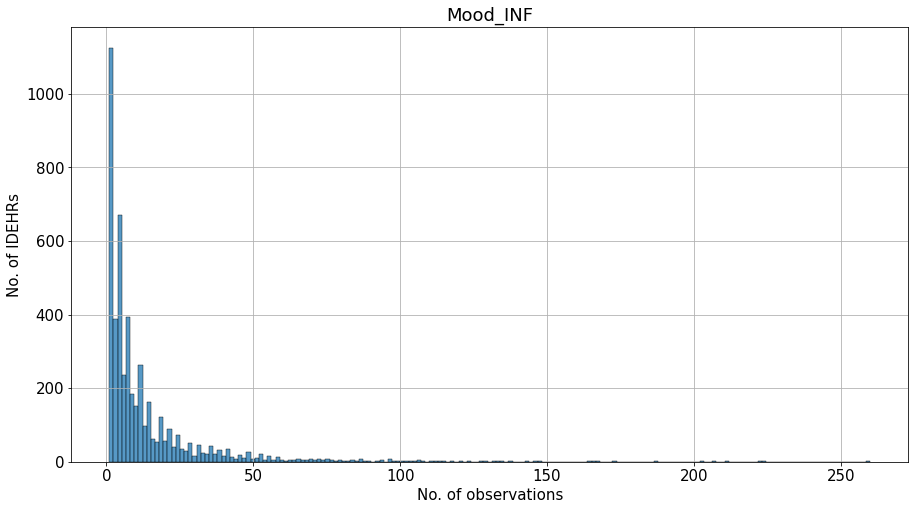

In [13]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_INF_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
print(df_obs.shape)
mood_inf = df_obs[['IDEHR', 'Stato_animo']].dropna().IDEHR.value_counts().values
get_histplot('Stato_animo', df_obs, 'Mood_INF')

In [14]:
# with pd.option_context("display.max_rows", 1000):
#     print(df_obs[['IDEHR', 'chk_stato_danimo']].dropna().loc[df_obs['IDEHR'] == 6762])

In [15]:
# pain relief
print(get_file_names(['IDEHR', 'EHRType', 'Sollievo_dolore'], df_ref))

['wH_DirectTable_DOLORE_MED_e_INF_VIDAS', 'wH_DirectTable_C_DOLORE_MED_e_INF_VIDAS']


(155437, 27)
No. of unique IDEHR:  3088


<Figure size 1080x576 with 0 Axes>

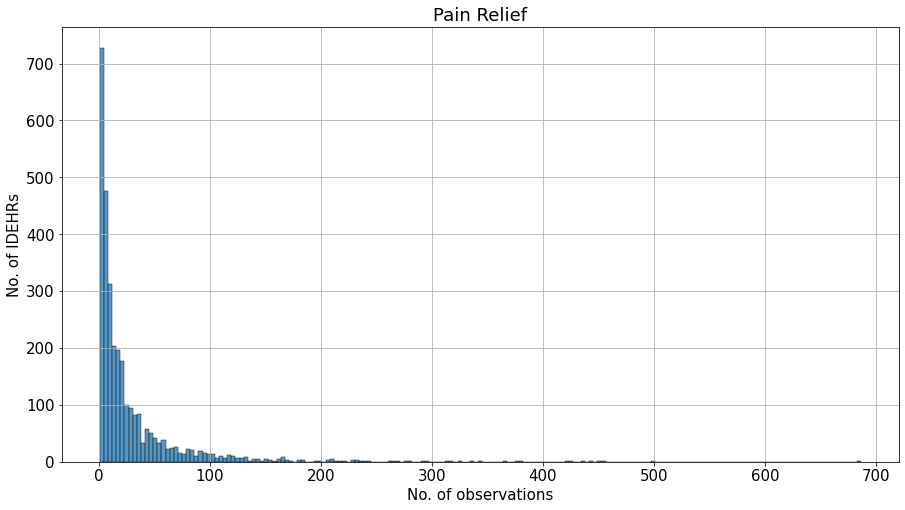

In [16]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_DOLORE_MED_e_INF_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
print(df_obs.shape)
pain = df_obs[['IDEHR', 'Sollievo_dolore']].dropna().IDEHR.value_counts().values
get_histplot('Sollievo_dolore', df_obs, 'Pain Relief')

In [17]:
# collaboration
print(get_file_names(['IDEHR', 'EHRType', 'opt_collaborazione'], df_ref))

['wH_DirectTable_C_VISITA_OSS_VIDAS', 'wH_DirectTable_VISITA_OSS_VIDAS']


C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (21,22,26,27,28,31,48,51,58,72,82,83,90,93,98,99,116,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(68790, 136)
No. of unique IDEHR:  2875


<Figure size 1080x576 with 0 Axes>

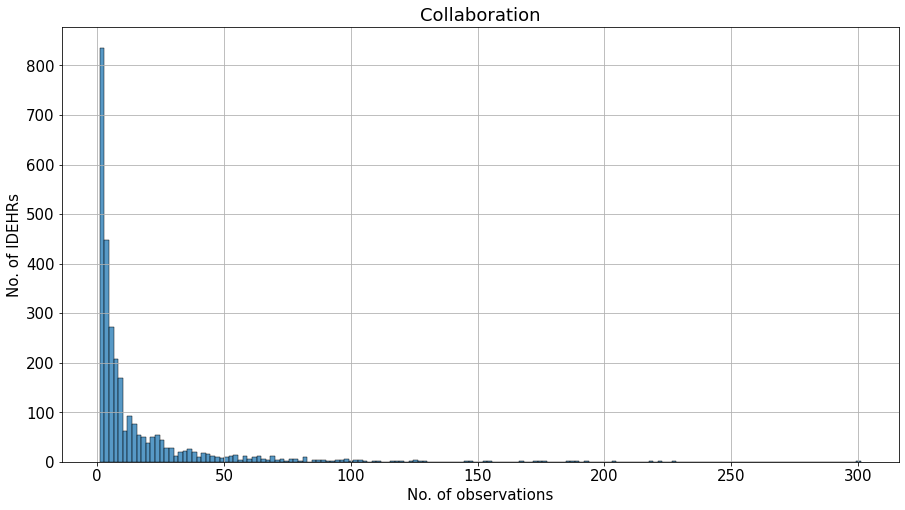

In [18]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_OSS_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
print(df_obs.shape)
collab = df_obs[['IDEHR', 'opt_collaborazione']].dropna().IDEHR.value_counts().values
get_histplot('opt_collaborazione', df_obs, 'Collaboration')

In [19]:
# attitude
print(get_file_names(['IDEHR', 'EHRType', 'opt_atteggiamento'], df_ref))

['wH_DirectTable_VISITA_FKT_VIDAS', 'wH_DirectTable_C_VISITA_FKT_VIDAS']


(4543, 57)
No. of unique IDEHR:  1090


<Figure size 1080x576 with 0 Axes>

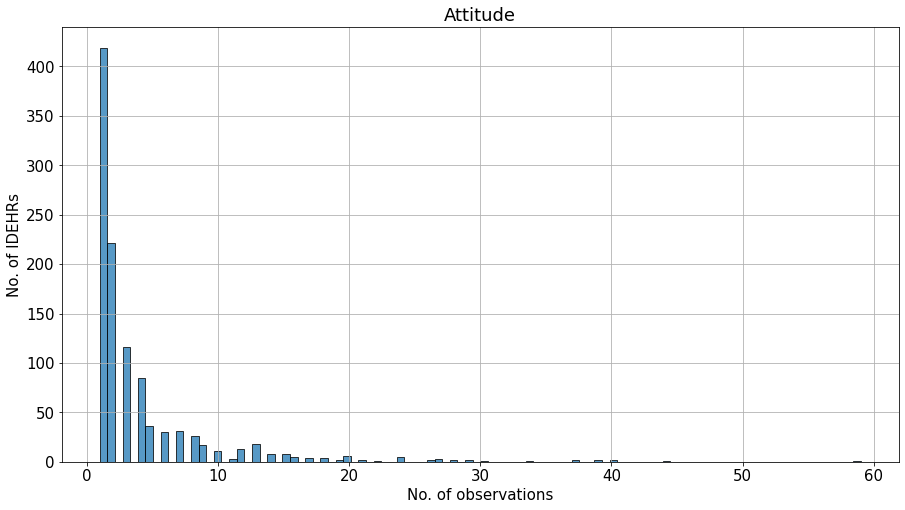

In [26]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_FKT_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
print(df_obs.shape)

att = df_obs[['IDEHR', 'opt_atteggiamento']].dropna().IDEHR.value_counts().values
get_histplot('opt_atteggiamento', df_obs, 'Attitude')

In [21]:
print(get_file_names(['IDEHR', 'EHRType', 'opt_depressione'], df_ref))

['wH_DirectTable_C_Scala_ESAS', 'wH_DirectTable_Scala_ESAS']


<Figure size 1080x720 with 0 Axes>

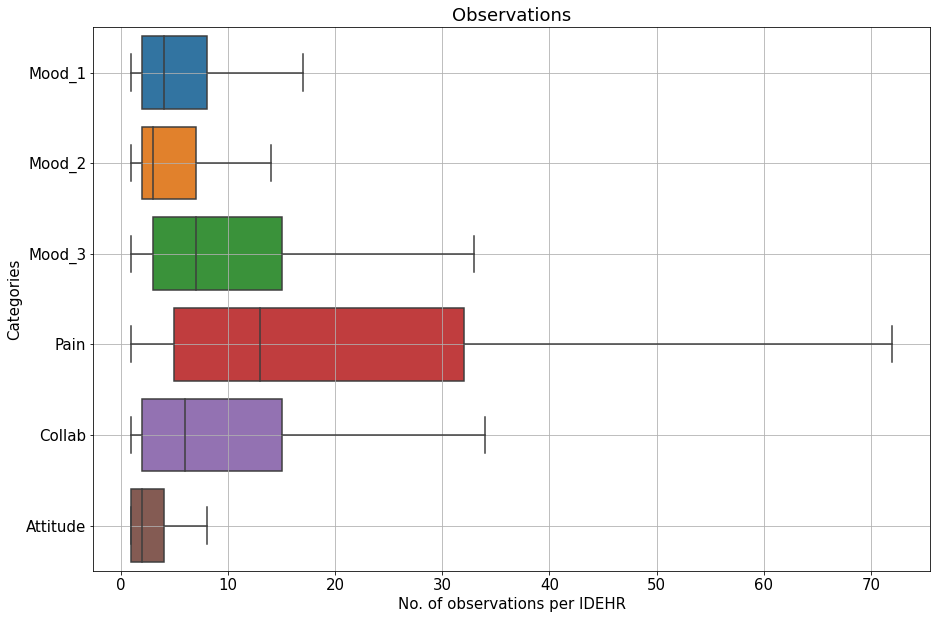

In [22]:
# box plots for observations across multiple categories
plt.rcParams['figure.figsize'] = [15, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
ax = sns.boxplot(data=[mood_med, mood_oss, mood_inf, pain, collab, att], orient='h', showfliers=False)
ax.set_yticklabels(['Mood_1', 'Mood_2', 'Mood_3', 'Pain', 'Collab', 'Attitude'])
ax.set_title('Observations')
ax.set_xlabel('No. of observations per IDEHR')
ax.set_ylabel('Categories')
plt.grid()
plt.show()